<a href="https://colab.research.google.com/github/Miriam0909/LocationShare/blob/master/TRABAJOFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Animals.zip to Animals.zip


In [ ]:
import zipfile
import os

ruta_zip = "/content/Animals.zip"  # Reemplaza con el nombre de tu archivo
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/Animals")

LOGS PARA TENSRBOARD

In [ ]:
# Extension de tensorboard
%load_ext tensorboard

# Limpiando logs de colab
!rm -rf ./logs/

# Definimos un directorio donde guardar los logs
log_dir_model = "logs/model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_model2 = "logs/model2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_modelCNN = "logs/modelCNN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_modelCNN2 = "logs/modelCNN2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_modelRes = "logs/modelRes/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_modelRes2 = "logs/modelRes2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


# TensorBoard callbacks para cada modelo
tensorboard_callback_model_1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_model, histogram_freq=1)
tensorboard_callback_model_2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_model2, histogram_freq=1)
tensorboard_callback_model_3 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_modelCNN, histogram_freq=1)
tensorboard_callback_model_4 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_modelCNN2, histogram_freq=1)
tensorboard_callback_model_5 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_modelRes, histogram_freq=1)
tensorboard_callback_model_6 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_modelRes2, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


CREAR SET DE DATOS

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define el directorio base
base_dir = '/content/Animals' # Cambia esto a tu directorio base

# Crea el generador de datos sin aumento
#datagen = ImageDataGenerator(rescale=1./255)

# Obtener una lista de las clases
classes = os.listdir(base_dir)
all_images = []
all_labels = []

for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        all_images.append(img_array)
        all_labels.append(class_index)  # Etiqueta como el índice de la clase

# Convertir listas a arrays
X = np.array(all_images)
y = np.array(all_labels)

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ahora dividir el conjunto de testeo  y validación (70% prueba, 30% validación)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42, stratify=y_test)

# Definir y mostrar los nombres de las clases
class_names = classes  # Ya que 'classes' contiene los nombres de las carpetas
print("Class names:", class_names)


IsADirectoryError: [Errno 21] Is a directory: '/content/Animals/Animals/dogs'

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3000, 128, 128, 3)
Shape of y: (3000,)


In [ ]:
print("Minimum pixel value:", X.min())
print("Maximum pixel value:", X.max())


Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [ ]:
print("Data type of X:", X.dtype)


Data type of X: float32


CARACTERÍSTICAS

In [ ]:
import numpy as np

# Inicializar un diccionario para contar las observaciones por categoría
observations_per_category = {class_name: 0 for class_name in classes}

# Contar el número de observaciones por categoría
unique, counts = np.unique(y_train, return_counts=True)
for idx, count in zip(unique, counts):
    observations_per_category[classes[idx]] += count

print("Number of observations per category:")
for class_name, count in observations_per_category.items():
    print(f"  {class_name}: {count}")


Number of observations per category:
  dogs: 700
  snakes: 700
  cats: 700


In [ ]:
# Contar total de observaciones en cada conjunto
total_train = len(X_train)
total_val = len(X_val)
total_test = len(X_test)

# Imprimir resultados
print(f"Total number of observations in Train: {total_train}")
print(f"Total number of observations in Validation: {total_val}")
print(f"Total number of observations in Test: {total_test}")

# Total general
total_observations = total_train + total_val + total_test
print(f"Total number of observations across all sets: {total_observations}")


Total number of observations in Train: 2100
Total number of observations in Validation: 270
Total number of observations in Test: 630
Total number of observations across all sets: 3000


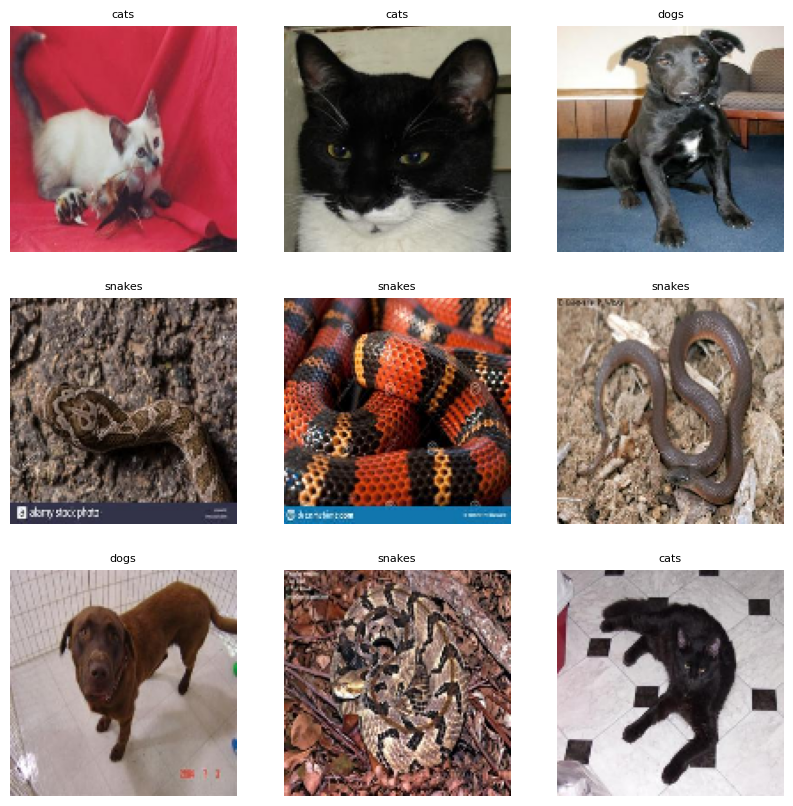

In [ ]:

import matplotlib.pyplot as plt
# Número de imágenes a mostrar
num_images = 9  # Puedes cambiar esto para mostrar más o menos imágenes

# Mostrar imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la figura según sea necesario

# Tomar un índice aleatorio para mostrar imágenes del conjunto de entrenamiento
indices = np.random.choice(len(X_train), num_images, replace=False)

for i, index in enumerate(indices):
    ax = plt.subplot(3, 3, i + 1)  # Crear una cuadrícula de subgráficos 3x3 (ajusta según sea necesario)
    plt.imshow(X_train[index] / 255.0)  # Mostrar la imagen (normalizada)
    plt.title(class_names[y_train[index]], fontsize=8)  # Establecer el título como el nombre de la clase
    plt.axis("off")  # Apagar las marcas y etiquetas de los ejes

plt.show()


NORMALIZAR

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print("Nueva distribución:", X_train.min(), X_train.max())

Nueva distribución: 0.0 1.0


APLANAR

In [ ]:
print(X_train.shape)
X_trainapl = X_train.reshape(X_train.shape[0], -1)
X_valapl = X_val.reshape(X_val.shape[0], -1)
X_testapl = X_test.reshape(X_test.shape[0], -1)
print(X_trainapl.shape)

(2100, 128, 128, 3)
(2100, 49152)


ONE-HOT

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_val = tf.keras.utils.to_categorical(y_val, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)
print(y_train.shape)

(2100, 3)


*MODELO* MLP #1 CON 20 EPOCHS Y ADAM CON TASA DE 0.0001

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime
from tensorflow.keras.optimizers import Adam


model = keras.models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_trainapl.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_trainapl, y_train, epochs=20, batch_size=16, validation_data=(X_valapl, y_val),
                    callbacks=[tensorboard_callback_model_1])


Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.3663 - loss: 1.3249 - val_accuracy: 0.4185 - val_loss: 1.0851
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.4547 - loss: 1.0749 - val_accuracy: 0.3444 - val_loss: 1.3572
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.4557 - loss: 1.1194 - val_accuracy: 0.4222 - val_loss: 1.2120
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5401 - loss: 0.9529 - val_accuracy: 0.4667 - val_loss: 1.0461
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5525 - loss: 0.9283 - val_accuracy: 0.4963 - val_loss: 1.0220
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5530 - loss: 0.9201 - val_accuracy: 0.4778 - val_loss: 1.0383
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.5863 - loss: 0.8930 - val_accuracy: 0.4704 - val_loss: 1.1642
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5888 - loss: 0.9134 - val

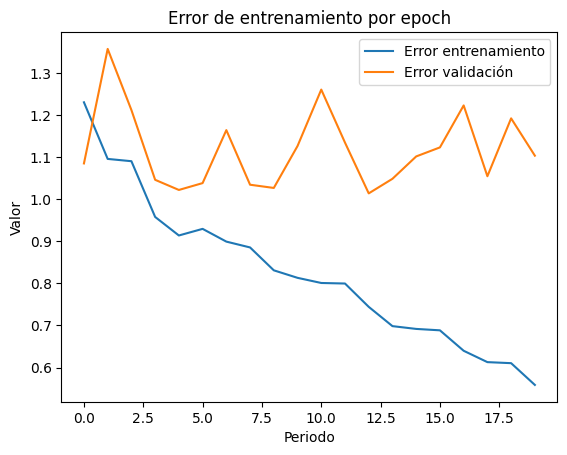

In [ ]:
# Ver resultados en entrenamiento y validación
plt.plot(history.history["loss"], label="Error entrenamiento")
plt.plot(history.history["val_loss"], label="Error validación")
plt.title("Error de entrenamiento por epoch")
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
# Obteniendo accuracy general con los datos de testeo
score = model.evaluate(X_testapl, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.030776023864746
Test accuracy: 0.5444444417953491


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
reales = np.argmax(y_test, axis=1)
predichos = np.argmax(model.predict(X_testapl), axis=1)
num_clases = 100
conf_matrix = confusion_matrix(reales, predichos)
print(conf_matrix)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[ 92  32  86]
 [ 38 121  51]
 [ 62  18 130]]


Modelo MLP 2 con 20 epochs y adam con tasa por defecto 0.001

In [ ]:
# Definimos el modelo

model2 = keras.models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(X_trainapl.shape[1],)))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

model2.compile(optimizer='adam',#que parametros cambiar
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(X_trainapl, y_train, epochs=20, batch_size=16, validation_data=(X_valapl, y_val),
                    callbacks=[tensorboard_callback_model_2])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.3533 - loss: 9.7010 - val_accuracy: 0.3333 - val_loss: 1.6276
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.4181 - loss: 1.2712 - val_accuracy: 0.3481 - val_loss: 1.7542
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3886 - loss: 1.3348 - val_accuracy: 0.4074 - val_loss: 1.1341
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4437 - loss: 1.1066 - val_accuracy: 0.4037 - val_loss: 1.2087
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4771 - loss: 1.0326 - val_accuracy: 0.4370 - val_loss: 1.1010
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.4800 - loss: 1.0603 - val_accuracy: 0.4222 - val_loss: 1.0728
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.5347 - loss: 0.9691 - val_accuracy: 0.4815 - val_loss: 1.0078
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5603 - loss: 0.9124 - va

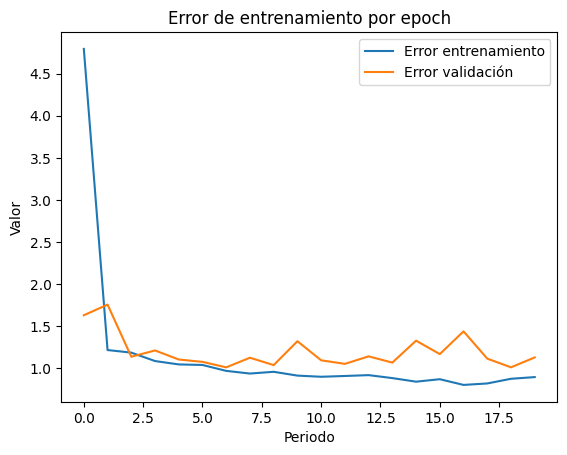

In [ ]:
# Ver resultados en entrenamiento y validación
plt.plot(history.history["loss"], label="Error entrenamiento")
plt.plot(history.history["val_loss"], label="Error validación")
plt.title("Error de entrenamiento por epoch")
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
# Obteniendo accuracy general
score = model2.evaluate(X_testapl, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0465445518493652
Test accuracy: 0.4650793671607971


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
reales = np.argmax(y_test, axis=1)
predichos = np.argmax(model2.predict(X_testapl), axis=1)
num_clases = 100
conf_matrix = confusion_matrix(reales, predichos)
print(conf_matrix)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[  4 111  95]
 [  0 171  39]
 [  2  90 118]]


Modelo CNN 1 con filtros 3x3 y maxpooling se le agrega dropout por el sobreajeste visto en la primera corrida y optimizador adam con tasa por defecto

In [ ]:
#Bloque 1
modelCNN = keras.models.Sequential()
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))) #capa de convolucion con 32 filtros de 3x3 con 3 canales
modelCNN.add(layers.MaxPooling2D((2, 2)))#capa de agrupamiento 2x2
modelCNN.add(layers.Dropout(0.5))
#Bloque 2
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))#capa de convolucion con 64 filtros 3x3
modelCNN.add(layers.MaxPooling2D((2, 2)))

modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelCNN.add(layers.Flatten())


modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(3, activation="softmax"))
modelCNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,843 (12.47 MB)

 Trainable params: 3,267,843 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = modelCNN.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard_callback_model_3])

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6198 - loss: 0.7639 - val_accuracy: 0.5741 - val_loss: 0.8792
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6768 - loss: 0.6925 - val_accuracy: 0.6407 - val_loss: 0.7325
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7284 - loss: 0.6191 - val_accuracy: 0.7111 - val_loss: 0.5993
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7585 - loss: 0.5444 - val_accuracy: 0.6815 - val_loss: 0.6325
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8353 - loss: 0.4109 - val_accuracy: 0.7000 - val_loss: 0.5966
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8707 - loss: 0.3131 - val_accuracy: 0.6778 - val_loss: 0.7519
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9010 - loss: 0.2642 - val_accuracy: 0.6704 - val_loss: 0.7896
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9306 - loss: 0.2099 - val_accu

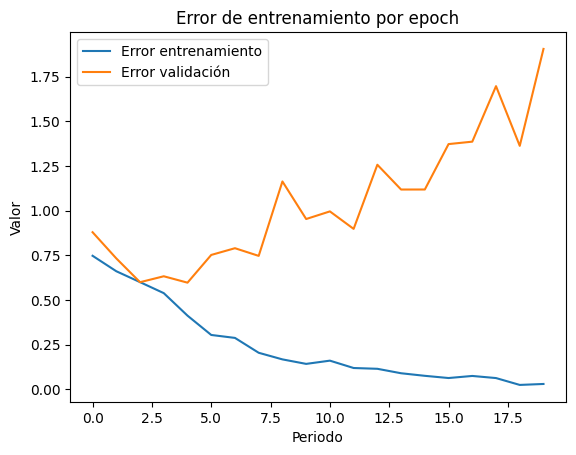

In [ ]:
# Ver resultados en entrenamiento y validación
plt.plot(history.history["loss"], label="Error entrenamiento")
plt.plot(history.history["val_loss"], label="Error validación")
plt.title("Error de entrenamiento por epoch")
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
# Obteniendo accuracy general
score = modelCNN.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.9394209384918213
Test accuracy: 0.6761904954910278


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
reales = np.argmax(y_test, axis=1)
predichos = np.argmax(modelCNN.predict(X_test), axis=1)
num_clases = 100
conf_matrix = confusion_matrix(reales, predichos)
print(conf_matrix)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[[111   6  93]
 [ 21 160  29]
 [ 44  11 155]]


Modelo CNN 2 con filtros 3x3 y averagepooling y optimizador sgd con tasa 0.001 y mometum 0.9 sin dropout

In [ ]:
#Bloque 1
modelCNN2 = keras.models.Sequential()
modelCNN2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))) #capa de convolucion con 32 filtros de 3x3 con 3 canales
modelCNN2.add(layers.AveragePooling2D((2, 2)))#capa de agrupamiento 2x2
#Bloque 2
modelCNN2.add(layers.Conv2D(64, (3, 3), activation='relu'))#capa de convolucion con 64 filtros 3x3
modelCNN2.add(layers.AveragePooling2D((2, 2)))

modelCNN2.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelCNN2.add(layers.Flatten()) #aplanamiento a 1 dimension
modelCNN2.add(layers.Dense(1024, activation='relu'))
modelCNN2.add(layers.Dense(3, activation="softmax"))
modelCNN2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 30, 30, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      51,381,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,440,643 (196.23 MB)

 Trainable params: 51,440,643 (196.23 MB)

 Non-trainable params: 0 (0.00 B)

**HASTA AQUÍ ME CORRIÓ FALTA CORRER ESTOS CON LOS NUEVOS PARÁMETROS**

In [ ]:
modelCNN2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = modelCNN2.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard_callback_model_4])

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3634 - loss: 1.1010

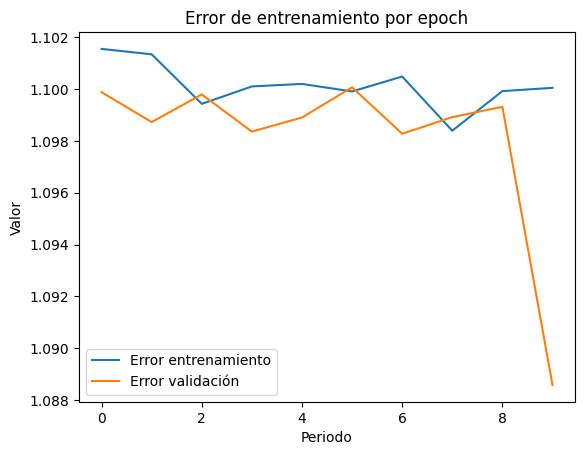

In [ ]:
# Ver resultados en entrenamiento y validación
plt.plot(history.history["loss"], label="Error entrenamiento")
plt.plot(history.history["val_loss"], label="Error validación")
plt.title("Error de entrenamiento por epoch")
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
# Obteniendo accuracy general
score = modelCNN2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0887707471847534
Test accuracy: 0.33888888359069824


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
reales = np.argmax(y_test, axis=1)
predichos = np.argmax(modelCNN2.predict(X_test), axis=1)
num_clases = 100
conf_matrix = confusion_matrix(reales, predichos)
print(conf_matrix)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[[150  79  71]
 [ 48 228  24]
 [ 96  78 126]]


Modelo ResNet50 con 1024 neuronas en la capa densa de relu y 10 epochs

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar el modelo pre-entrenado ResNet50 (sin la capa de clasificación)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Agregar capas personalizadas para clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Crear el modelo final
modelRes = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
modelRes.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelRes.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = modelRes.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard_callback_model_5])

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 126ms/step - accuracy: 0.4165 - loss: 1.1050 - val_accuracy: 0.5270 - val_loss: 1.0152
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5259 - loss: 1.0019 - val_accuracy: 0.5571 - val_loss: 0.8841
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5545 - loss: 0.8936 - val_accuracy: 0.5429 - val_loss: 0.8990
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5669 - loss: 0.8422 - val_accuracy: 0.6000 - val_loss: 0.8834
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5958 - loss: 0.8425 - val_accuracy: 0.5683 - val_loss: 0.8664
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6150 - loss: 0.7918 - val_accuracy: 0.6095 - val_loss: 0.8221
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6218 - loss: 0.7814 - val_accuracy: 0.5619 - val_loss: 0.9010
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6327 - loss: 0.7967 - val_accuracy: 0.4730 -

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.3204885721206665
Test accuracy: 0.3333333432674408


Modelo ResNet50 #2 con 512 neuronas en la capa densa de relu y 20 epochs y optimizador RMSprop con tasa 0.001

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Cargar el modelo pre-entrenado ResNet50 (sin la capa de clasificación)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Agregar capas personalizadas para clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)#parametro cambiado?
predictions = Dense(3, activation='softmax')(x)

# Crear el modelo final
modelRes2 = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
modelRes2.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelRes2.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = modelRes2.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard_callback_model_6])

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.3956 - loss: 1.0947 - val_accuracy: 0.5063 - val_loss: 0.9741
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5278 - loss: 0.9368 - val_accuracy: 0.5587 - val_loss: 0.8998
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5482 - loss: 0.8957 - val_accuracy: 0.5302 - val_loss: 0.9003
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5910 - loss: 0.8582 - val_accuracy: 0.5937 - val_loss: 0.8420
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5812 - loss: 0.8225 - val_accuracy: 0.4762 - val_loss: 0.9818
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6072 - loss: 0.7943 - val_accuracy: 0.5905 - val_loss: 0.8434
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6115 - loss: 0.7895 - val_accuracy: 0.6143 - val_loss: 0.8267
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6251 - loss: 0.7867 - val_accuracy: 0.6127 -

In [ ]:
score = modelRes2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8008024096488953
Test accuracy: 0.6311110854148865


In [ ]:
%tensorboard --logdir logs